In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision

from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
from torchvision.models import densenet121

In [5]:
model = densenet121(pretrained=True)
num_features = model.classifier.in_features
model.classifier = nn.Linear(in_features=num_features, out_features=2, bias=True)
model = model.to(device)

epochs = 5
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
creterion = nn.CrossEntropyLoss()

In [6]:
import gen_train_test_data
trainloader = gen_train_test_data.get_trainloader('data_train/')
testloader = gen_train_test_data.get_testloader('data_test/')

losses = []
accuracies = []
precisions = []
recalls = []
F1_scores = []
turns = 0

for epoch in range(epochs):
    for x, y in trainloader:
        inputs = x.to(device)
        labels = y.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = creterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        with torch.no_grad():
            turns += 1
            _, predicted = torch.max(outputs.cpu(), dim=1)
            labels = labels.cpu()
            tp = torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
            tn = torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
            fp = torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
            fn = torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
            accuracy = (tp+tn)/(tp+tn+fp+fn)
            precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
            recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            F1_scores.append((2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0)
            print(f'turns:{turns}, loss:{loss.item()}')

turns:1, loss:0.711124062538147
turns:2, loss:0.3940545320510864
turns:3, loss:0.07544469088315964
turns:4, loss:0.15447530150413513
turns:5, loss:0.018918095156550407
turns:6, loss:0.19612440466880798
turns:7, loss:0.013645140454173088
turns:8, loss:0.2243068665266037
turns:9, loss:0.02167046070098877
turns:10, loss:0.24653199315071106
turns:11, loss:0.3228302001953125
turns:12, loss:0.18062452971935272
turns:13, loss:0.2034139633178711
turns:14, loss:0.033644068986177444
turns:15, loss:0.027490446344017982
turns:16, loss:0.0037888591177761555
turns:17, loss:0.04339641332626343
turns:18, loss:0.005080001428723335
turns:19, loss:0.009437894448637962
turns:20, loss:0.16975463926792145
turns:21, loss:0.2743999660015106
turns:22, loss:0.036731794476509094
turns:23, loss:0.007300953380763531
turns:24, loss:0.01689458079636097
turns:25, loss:0.03869227319955826
turns:26, loss:0.0017443246906623244
turns:27, loss:0.0013458519242703915
turns:28, loss:0.9235333204269409
turns:29, loss:0.011666

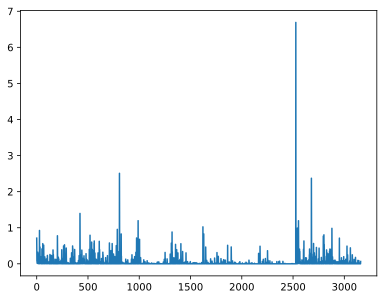

In [7]:
plt.plot(range(len(losses)), losses)

训练集精度: 100.0%


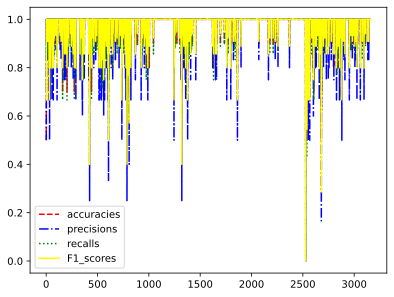

In [8]:
lens = len(accuracies)+1
plt.plot(range(1, lens), accuracies, color='red', linestyle='--', label='accuracies')
plt.plot(range(1, lens), precisions, color='blue', linestyle='-.', label='precisions')
plt.plot(range(1, lens), recalls, color='green', linestyle=':', label='recalls')
plt.plot(range(1, lens), F1_scores, color='yellow', linestyle='-', label='F1_scores')
plt.legend()

print(f'训练集精度: {100*accuracies[len(accuracies)-1]}%')

In [9]:
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs.to(device))
        _, predicted = torch.max(outputs.cpu(), dim=1)
        labels = labels.cpu()
        tp = torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
        tn = torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
        fp = torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
        fn = torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
print(f'测试集准确率: {100*accuracy}%')
print(f'测试集精确率: {100*precision}%')
print(f'测试集召回率: {100*recall}%')
print(f'测试集F1值: {(2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0}')

测试集准确率: 100.0%
测试集精确率: 100.0%
测试集召回率: 100.0%
测试集F1值: 1.0


In [10]:
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs.to(device))
        _, predicted = torch.max(outputs.cpu(), dim=1)
        for i in range(len(predicted)):
            print(f'predict:{predicted[i]}, label:{labels[i]}')

predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:1, label:1
predict:1, label:1
predict:0, label:0
predict:1, label:1
predict:0, label:0
predict:1, label:1
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:1, label:1
predict:1, label:1
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:1, label:1
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:1, label:1
predict:1, label:1
predict:0, label:0
predict:1, label:1
predict:0, label:0
predict:1, label:1
predict:0, label:0
predict:1, label:1
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:1, label:1
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:1, label:1
predict:0, l

In [12]:
# torch.save(model.state_dict(), './mymodel/densenet121/lr=0.001.pth')